In [2]:
import pandas as pd
import missingno as msno

import numpy as np

import warnings
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv("acs2017_census_tract_data.csv")

In [17]:
data.iloc[:, :20].head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional
0,1001020100,Alabama,Autauga County,1845,48.726287,51.273713,2.4,86.3,5.2,0.0,1.2,0.0,76.260163,67826.0,14560.0,33018.0,6294.0,10.7,20.8,38.5
1,1001020200,Alabama,Autauga County,2172,53.729282,46.270718,1.1,41.6,54.5,0.0,1.0,0.0,76.058932,41287.0,3819.0,18996.0,2453.0,22.4,35.8,30.5
2,1001020300,Alabama,Autauga County,3385,45.288035,54.711965,8.0,61.4,26.5,0.6,0.7,0.4,73.264402,46806.0,9496.0,21236.0,2562.0,14.7,21.1,27.9
3,1001020400,Alabama,Autauga County,4267,46.894774,53.105226,9.6,80.3,7.1,0.5,0.2,0.0,76.329974,55895.0,4369.0,28068.0,3190.0,2.3,1.7,29.0
4,1001020500,Alabama,Autauga County,9965,50.717511,49.282489,0.9,77.5,16.4,0.0,3.1,0.0,72.543904,68143.0,14424.0,36905.0,10706.0,12.2,17.9,48.8


In [22]:
data.iloc[:, 20:].head()

,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,State_freq
0,15.6,22.8,10.8,12.4,94.2,3.3,0.0,0.5,0.0,2.1,24.5,47.750678,74.2,21.2,4.5,0.0,4.6,0.016131
1,24.9,22.9,6.3,15.4,90.5,9.1,0.0,0.0,0.5,0.0,22.2,39.226519,75.9,15.0,9.0,0.0,3.4,0.016131
2,19.4,33.3,9.9,9.6,88.3,8.4,0.0,1.0,0.8,1.5,23.1,43.781388,73.3,21.1,4.8,0.7,4.7,0.016131
3,16.6,25.8,9.1,19.5,82.3,11.2,0.0,1.5,2.9,2.1,25.9,43.332552,75.8,19.7,4.5,0.0,6.1,0.016131
4,13.8,20.5,3.5,13.4,86.9,11.2,0.0,0.8,0.3,0.7,21.0,48.038133,71.4,24.1,4.5,0.0,2.3,0.016131


In [6]:
# Converting columns with absolute values to % of Total Population
percent = ['Men','Women','VotingAgeCitizen','Employed']
data[percent] = data[percent].div(data["TotalPop"], axis=0)*100

In [9]:
data.isna().sum()

TractId                0
State                  0
County                 0
TotalPop               0
Men                  696
Women                696
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen     696
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed             696
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64

<AxesSubplot: >

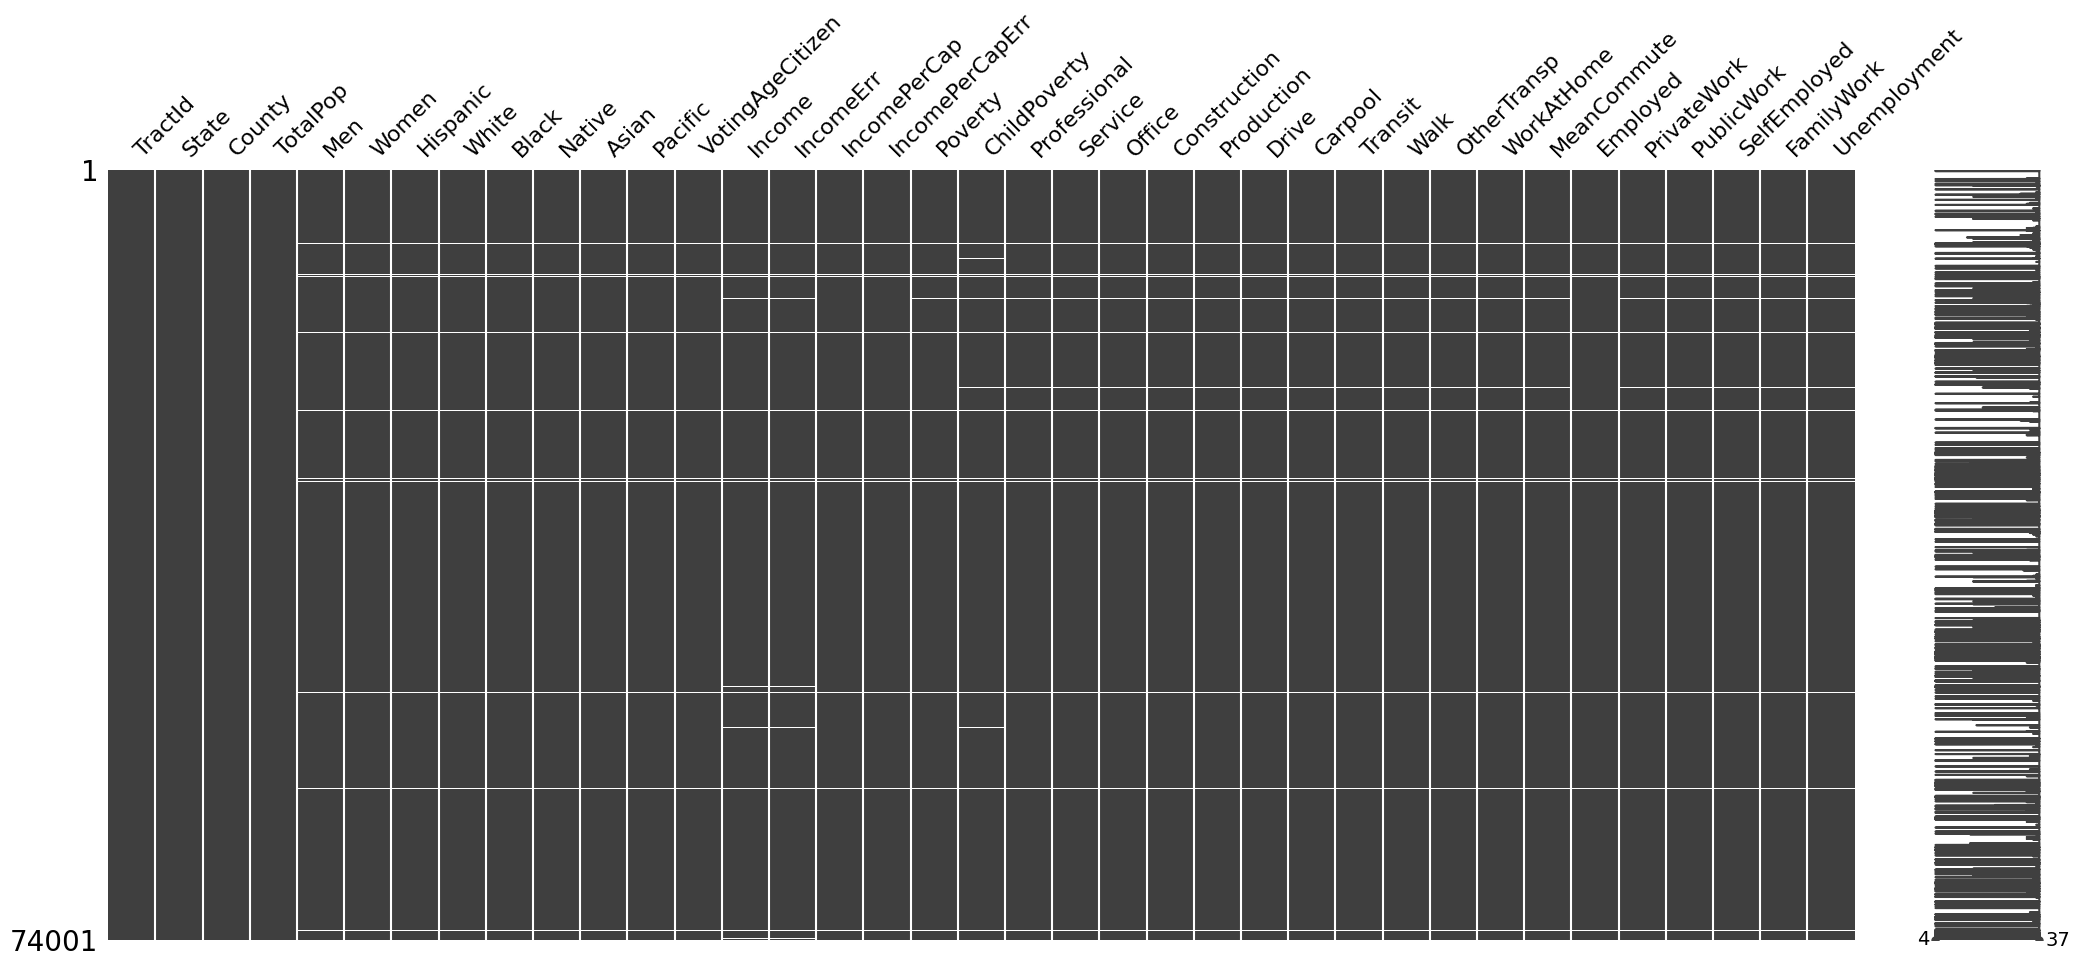

In [10]:
msno.matrix(data)

In [9]:
data.dropna(subset='Income', axis=0, inplace=True)

In [18]:
data.isna().sum()

TractId             0
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64

In [15]:
data.dropna(inplace=True)
#data = data.loc[data['TotalPop'] > 0]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72718 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           72718 non-null  int64  
 1   State             72718 non-null  object 
 2   County            72718 non-null  object 
 3   TotalPop          72718 non-null  int64  
 4   Men               72718 non-null  float64
 5   Women             72718 non-null  float64
 6   Hispanic          72718 non-null  float64
 7   White             72718 non-null  float64
 8   Black             72718 non-null  float64
 9   Native            72718 non-null  float64
 10  Asian             72718 non-null  float64
 11  Pacific           72718 non-null  float64
 12  VotingAgeCitizen  72718 non-null  float64
 13  Income            72718 non-null  float64
 14  IncomeErr         72718 non-null  float64
 15  IncomePerCap      72718 non-null  float64
 16  IncomePerCapErr   72718 non-null  float6

In [19]:
data.duplicated().sum()

0

In [20]:
data['State_freq']=data['State'].map(data['State'].value_counts()/72718)

In [21]:
data.groupby('State')['Income'].agg(['mean', 'median']).sort_values(by='mean')


,mean,median
State,,
Puerto Rico,21206.667429,18440.0
Mississippi,41510.481651,38862.5
West Virginia,44055.517598,41387.0
Arkansas,44245.267936,41301.0
Alabama,45955.352941,41758.0
Louisiana,46892.042819,43627.0
Kentucky,47975.172257,43177.0
New Mexico,48941.945783,44799.5
South Carolina,49375.685476,45739.0


In [23]:
data.drop(['TractId', 'County', 'State', 'TotalPop', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr'], axis=1, inplace=True)

In [24]:
y = data['Income']
X = data.drop(['Income'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_

Text(0.5, 1.0, 'Feature Importance')

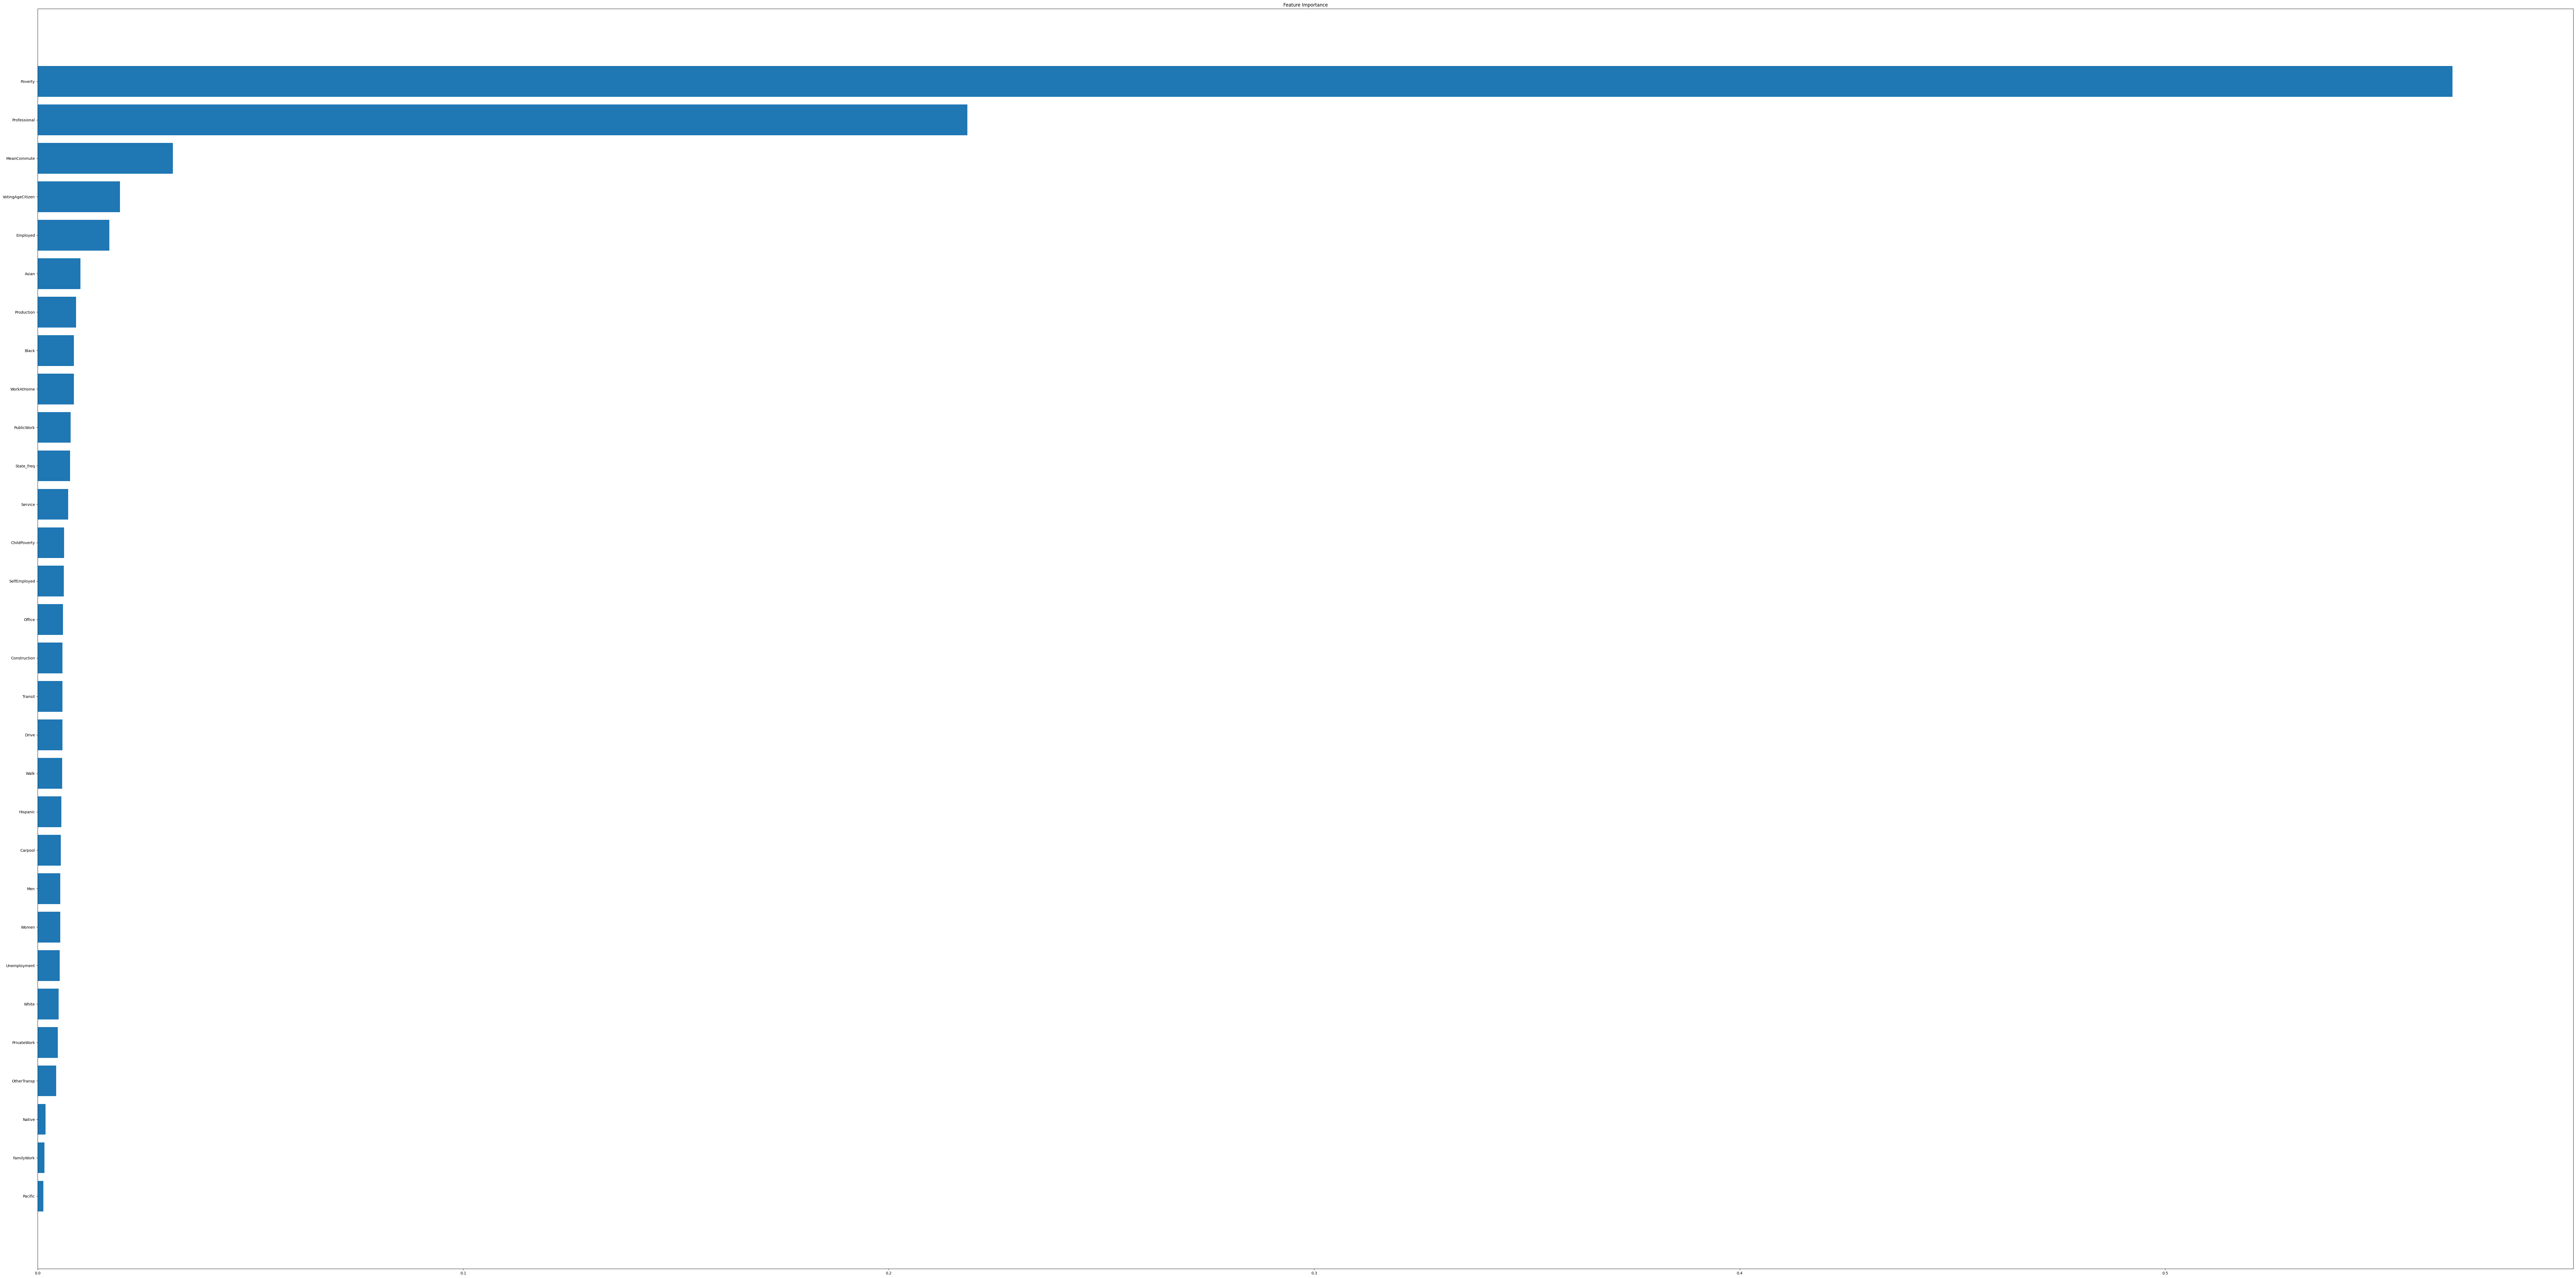

In [26]:
# indices = np.argsort(importances)

# fig, ax = plt.subplots()
# fig = plt.figure(figsize=(120, 60))
# ax.barh(range(len(importances)), importances[indices])
# ax.set_yticks(range(len(importances)))
# ax.set_yticklabels(np.array(X_train.columns)[indices])


feature_importance = forest.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(120, 60))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Text(0.5, 1.0, 'Permutation Importance')

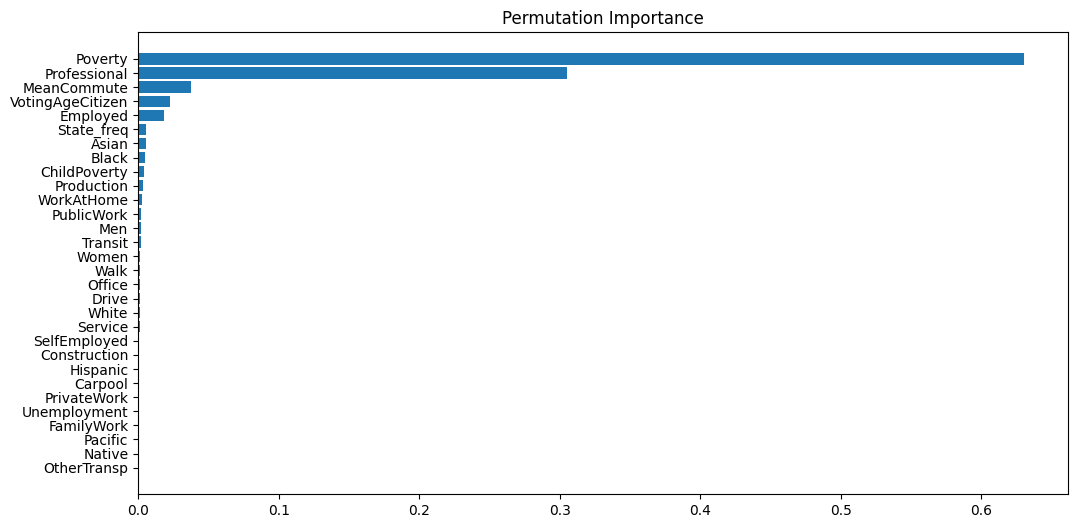

In [27]:
perm_importance = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(120, 60))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()